# ML Tutorial Day 11

## Random Forest

Now we can create multiple decision trees and create a random forest out of those trees. The trees are created taking random samples from the dataset and then traversed to get the final decision.
Once all the trees are traversed, we take the majority vote to make the decision.

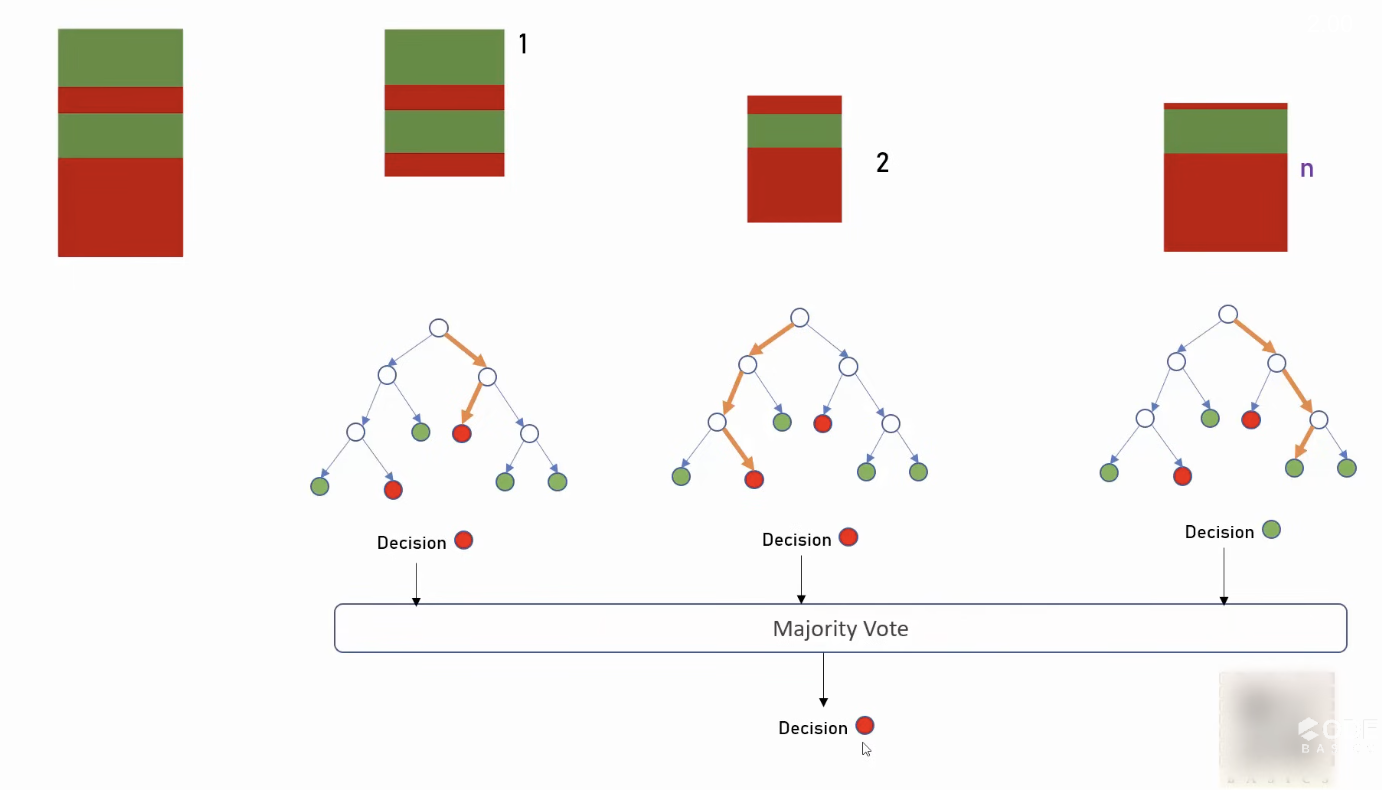

We will use the random forest model to predict number from their images as stored in the sklearn.digits module

<Figure size 640x480 with 0 Axes>

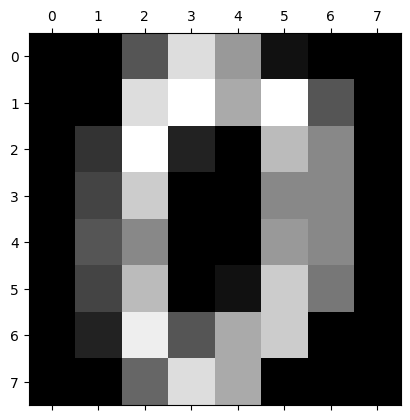

In [7]:
# importing relevant libraries
from sklearn.datasets import load_digits
import pandas as pd
from matplotlib import pyplot as plt

# creating the dataset
digit = load_digits()

# plotting the data
plt.gray()
plt.matshow(digit.images[0])

In [9]:
# creating a pandas dataframe
df = pd.DataFrame(digit.data)
df['target'] = digit.target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
# creating test-train data
X = df.drop(['target'], axis = 1)
y = df['target']

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
1039,0.0,0.0,2.0,14.0,9.0,1.0,0.0,0.0,0.0,1.0,12.0,12.0,11.0,8.0,0.0,0.0,0.0,4.0,14.0,1.0,0.0,13.0,3.0,0.0,0.0,8.0,13.0,0.0,0.0,10.0,6.0,0.0,0.0,5.0,16.0,1.0,0.0,8.0,9.0,0.0,0.0,0.0,16.0,0.0,0.0,11.0,9.0,0.0,0.0,0.0,13.0,11.0,10.0,15.0,4.0,0.0,0.0,0.0,3.0,15.0,16.0,5.0,0.0,0.0
350,0.0,0.0,6.0,15.0,16.0,3.0,0.0,0.0,0.0,3.0,16.0,12.0,15.0,8.0,0.0,0.0,0.0,0.0,4.0,0.0,14.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,6.0,2.0,0.0,0.0,0.0,4.0,14.0,16.0,16.0,8.0,0.0,0.0,0.0,15.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,0.0,0.0,0.0,0.0
243,0.0,2.0,15.0,15.0,5.0,0.0,0.0,0.0,0.0,5.0,16.0,16.0,11.0,0.0,0.0,0.0,0.0,9.0,15.0,16.0,12.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,14.0,14.0,16.0,5.0,0.0,0.0,2.0,14.0,16.0,13.0,9.0,1.0,0.0
648,0.0,2.0,11.0,16.0,15.0,2.0,0.0,0.0,0.0,12.0,16.0,15.0,16.0,4.0,0.0,0.0,0.0,2.0,3.0,2.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0,14.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,3.0,11.0,9.0,0.0,0.0,0.0,16.0,16.0,16.0,16.0,6.0,0.0,0.0,0.0,14.0,15.0,12.0,5.0,0.0,0.0
1186,0.0,0.0,13.0,14.0,9.0,1.0,0.0,0.0,0.0,5.0,16.0,12.0,12.0,12.0,1.0,0.0,0.0,6.0,16.0,2.0,2.0,16.0,5.0,0.0,0.0,3.0,16.0,5.0,3.0,16.0,9.0,0.0,0.0,0.0,9.0,16.0,16.0,16.0,10.0,0.0,0.0,0.0,0.0,6.0,7.0,15.0,9.0,0.0,0.0,0.0,0.0,0.0,6.0,16.0,5.0,0.0,0.0,0.0,10.0,16.0,16.0,12.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0.0,0.0,5.0,16.0,15.0,5.0,0.0,0.0,0.0,0.0,8.0,13.0,9.0,15.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,4.0,0.0,0.0,0.0,11.0,10.0,10.0,15.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,15.0,13.0,4.0,0.0,0.0,7.0,16.0,13.0,10.0,8.0,3.0
163,0.0,6.0,16.0,16.0,16.0,15.0,10.0,0.0,0.0,9.0,16.0,13.0,8.0,6.0,5.0,0.0,0.0,12.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,13.0,0.0,0.0,0.0,0.0,1.0,5.0,16.0,9.0,0.0,0.0,0.0,0.0,9.0,16.0,11.0,0.0,0.0,0.0,0.0
1388,0.0,0.0,4.0,16.0,12.0,1.0,0.0,0.0,0.0,2.0,16.0,16.0,11.0,8.0,0.0,0.0,0.0,3.0,16.0,13.0,1.0,14.0,2.0,0.0,0.0,4.0,16.0,0.0,0.0,13.0,4.0,0.0,0.0,4.0,15.0,0.0,0.0,13.0,8.0,0.0,0.0,1.0,16.0,1.0,0.0,14.0,5.0,0.0,0.0,0.0,10.0,8.0,7.0,15.0,1.0,0.0,0.0,0.0,2.0,13.0,16.0,8.0,0.0,0.0
580,0.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,15.0,7.0,2.0,14.0,1.0,0.0,0.0,6.0,16.0,2.0,9.0,16.0,11.0,0.0,0.0,9.0,14.0,9.0,16.0,15.0,6.0,0.0,0.0,5.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,0.0,2.0,11.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0


In [12]:
# training the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# testing the model
model.score(X_test, y_test)

0.9638888888888889

array([[33,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 38,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 34,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 38]])

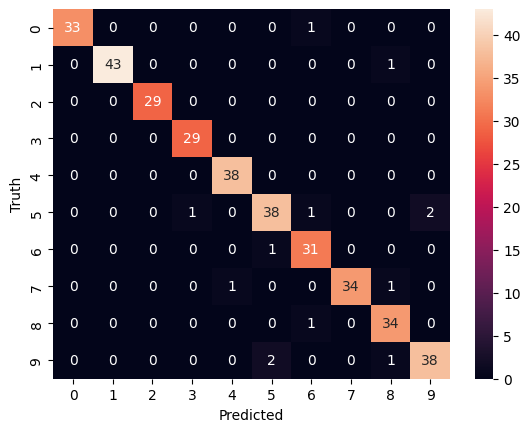

In [17]:
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

confm = confusion_matrix(model.predict(X_test), y_test)
sn.heatmap(confm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

confm